In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset('iris')

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length


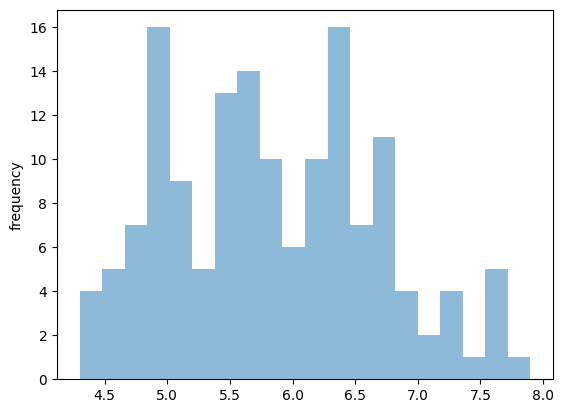

sepal_width


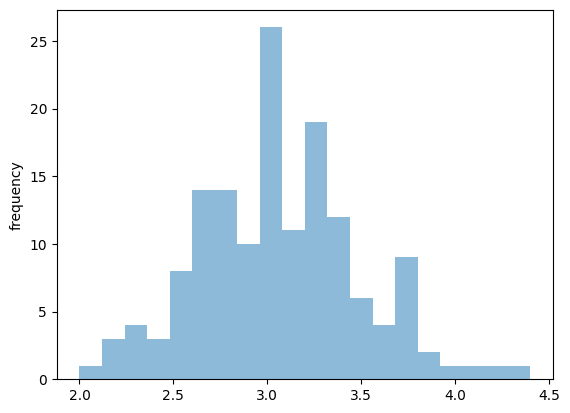

petal_length


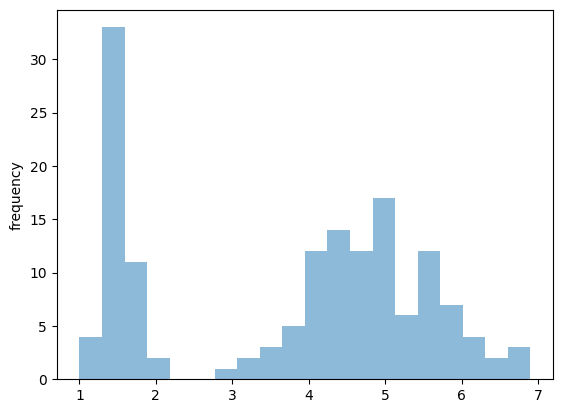

petal_width


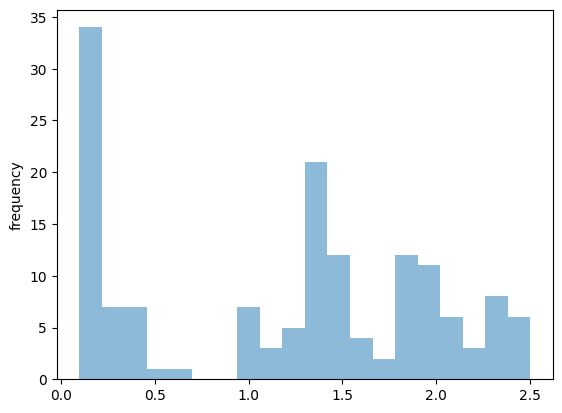

In [6]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in cols:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha = 0.5, bins = 20)
    plt.ylabel('frequency')
    plt.show()   

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


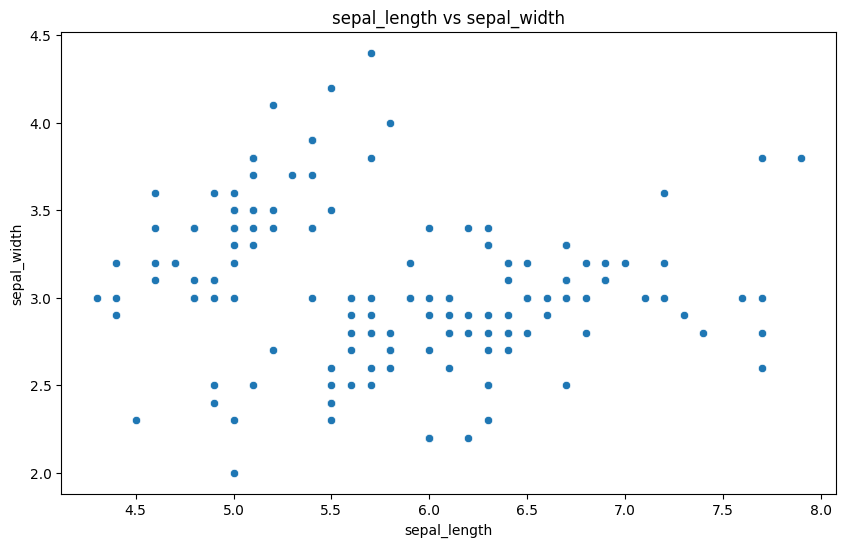

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width'], data = df, marker = 'o')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')
plt.show()

In [17]:
X = df[['sepal_length', 'sepal_width']]

In [18]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    sse.append(km.inertia_)

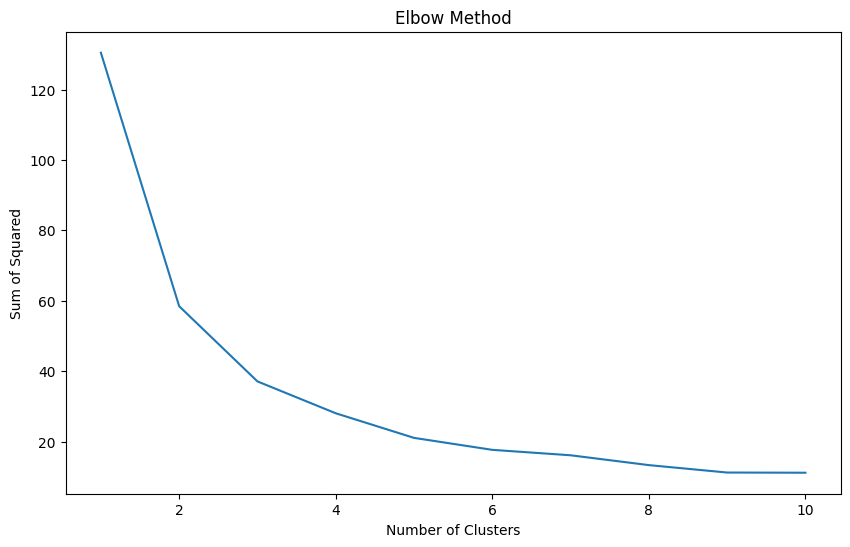

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared')
plt.title('Elbow Method')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [21]:
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [22]:
pred = kmeans.predict(X)

Text(0.5, 1.0, 'sepal_length vs sepal_width')

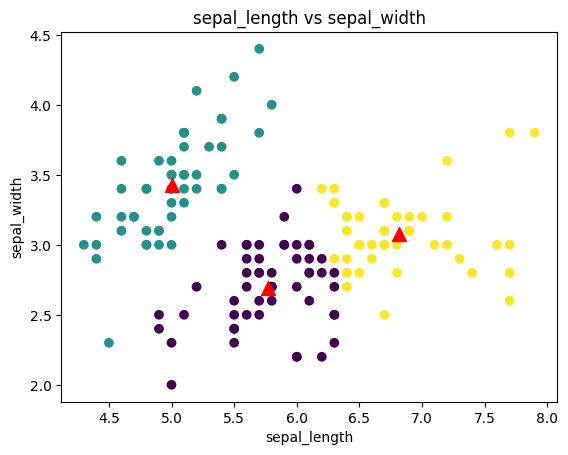

In [23]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = pred, cmap = 'viridis', marker = 'o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', marker='^')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')

In [24]:
print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(X, pred))

Inertia:  37.05070212765958
Silhouette Score:  0.4450525692083638


In [25]:
new_point = [[5.2, 1.3]]
new_point_pred = kmeans.predict(new_point)
print(new_point_pred)

[0]


Text(0.5, 1.0, 'sepal_length vs sepal_width')

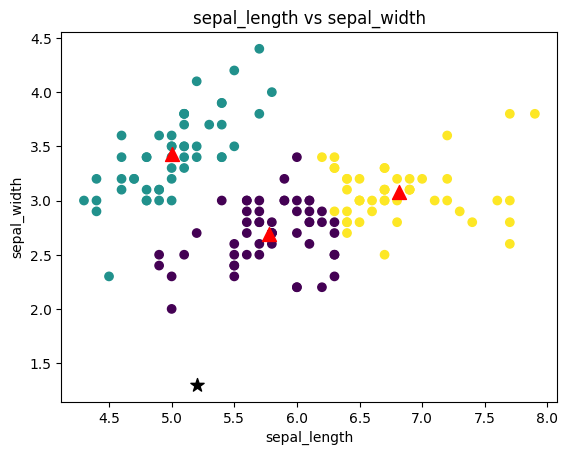

In [26]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = pred, cmap = 'viridis', marker = 'o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', marker='^', label = 'Centroids')
plt.scatter(new_point[0][0], new_point[0][1], s = 100, c = 'black', marker='*', label = 'New Point')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')